In [2]:
%load_ext autoreload
%autoreload 2
from modules import read_and_write
from modules import polyakov
from modules import utility
from modules import fourier_surface
import os
import glob

## Load data

In [15]:
from modules.globals import folder_names

smooth_surfaces= {}
choose_folder = 11
folder = folder_names[choose_folder-1]
files = glob.glob(os.path.join(folder, "surface_smooth_*"))
for file in files:
    file_name = file.split("/")[-1]
    smearing_level = file_name.split("_")[-1]
    volume, surface = read_and_write.read_surface_data(folder, file_name)
    smooth_surfaces[smearing_level] = surface
utility.display_markdown_title(folder)

# $\text{SU}(4)$, $V$ = ['44', '44', '64', '6'], $\beta=$ 10.85, twist coeff $=$ 1

dict_keys(['50', '40', '20', '30', '10', '5'])


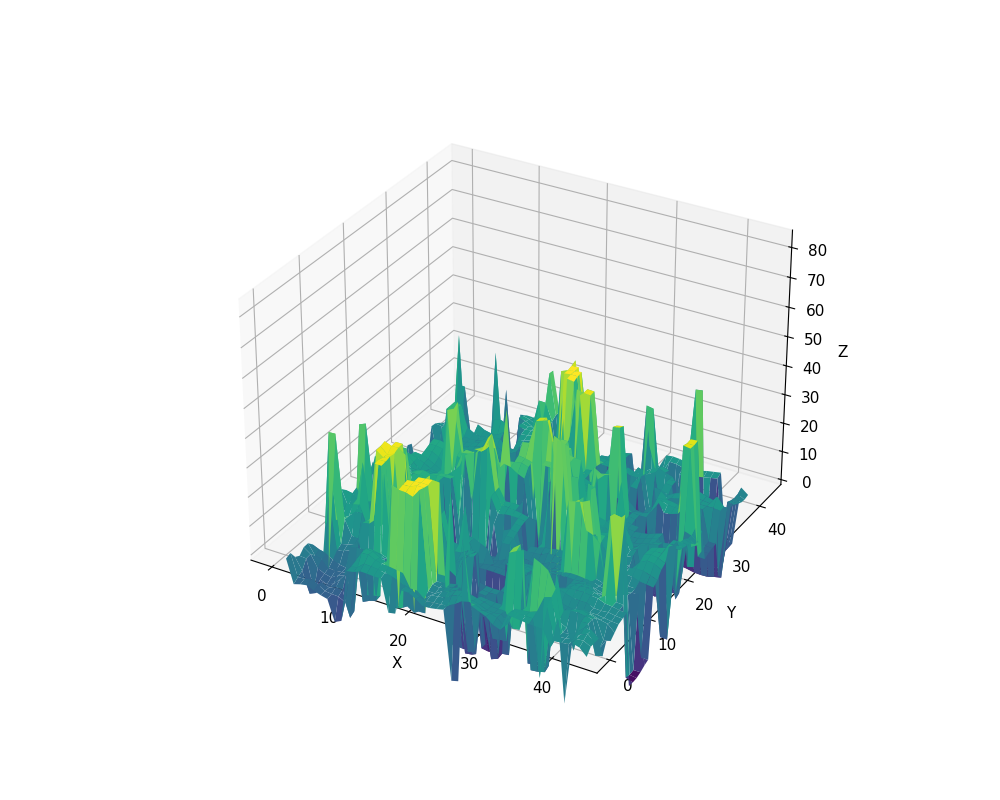

In [16]:
%matplotlib widget
smearing_level = "5"
print(smooth_surfaces.keys())
index =   16  # addded thermalization
fourier_surface.surface_in_3d(smooth_surfaces[smearing_level][index])
#print(smooth_surfaces[smearing_level][index]["z"].max()-smooth_surfaces[smearing_level][index]["z"].min())

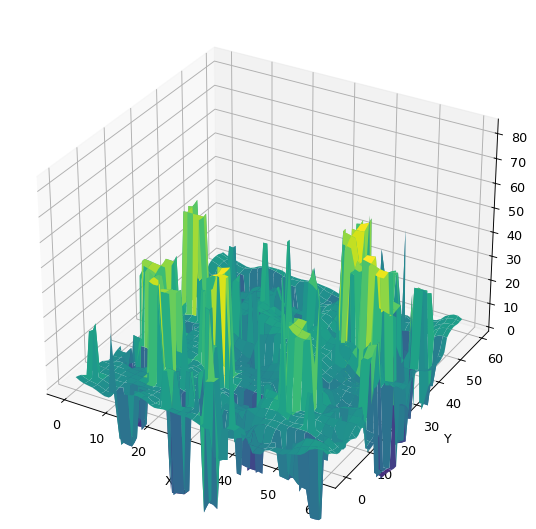

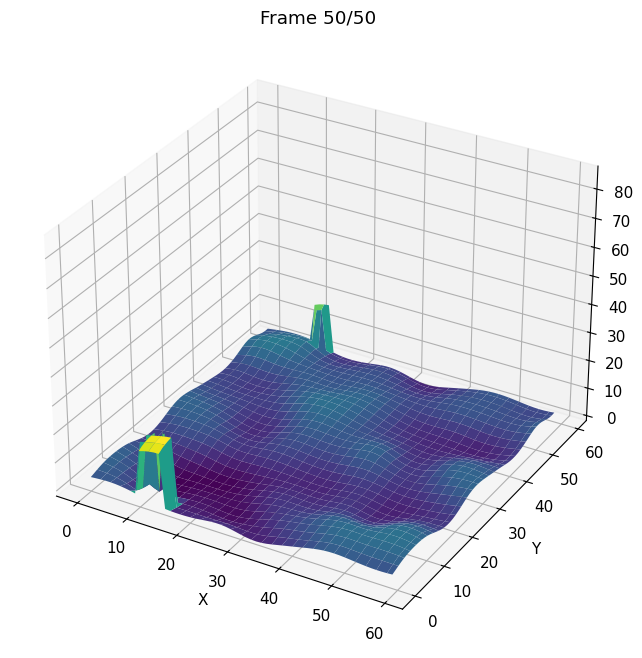

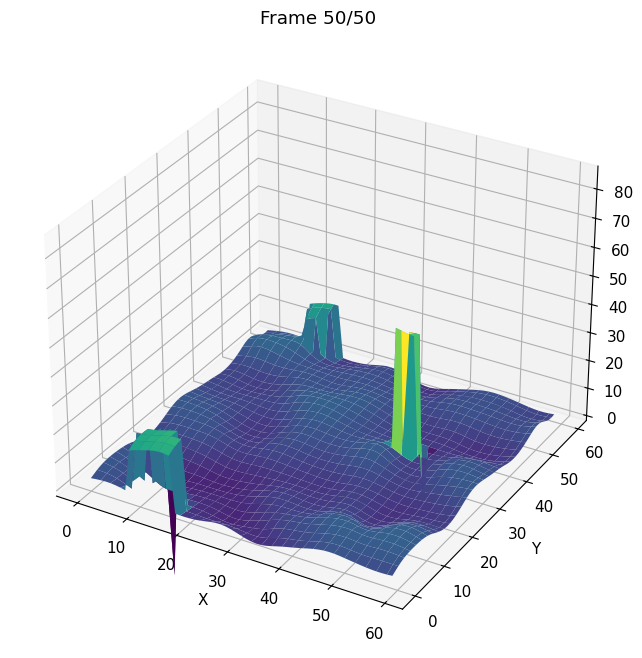

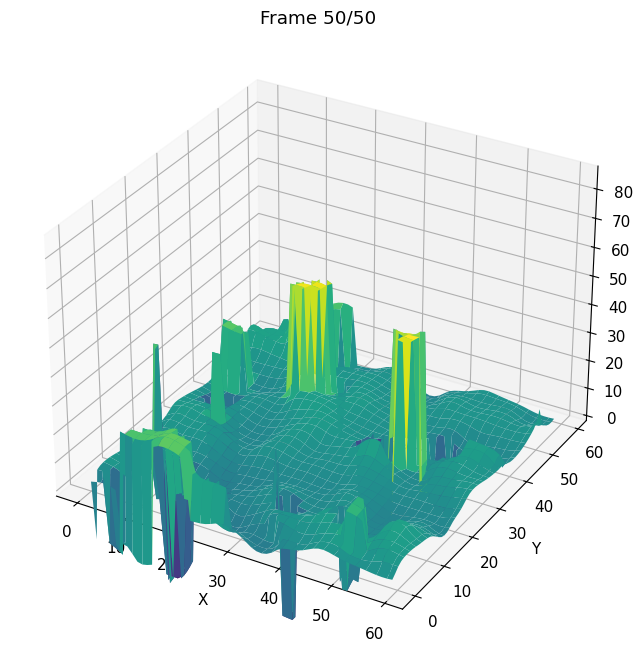

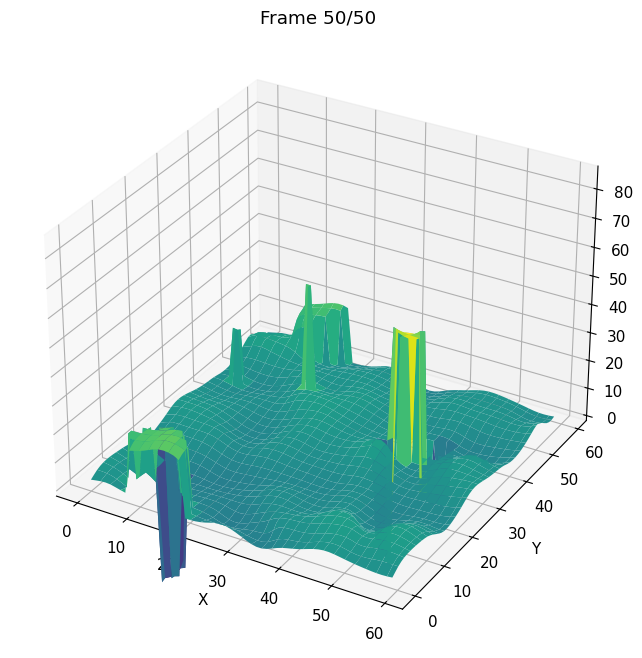

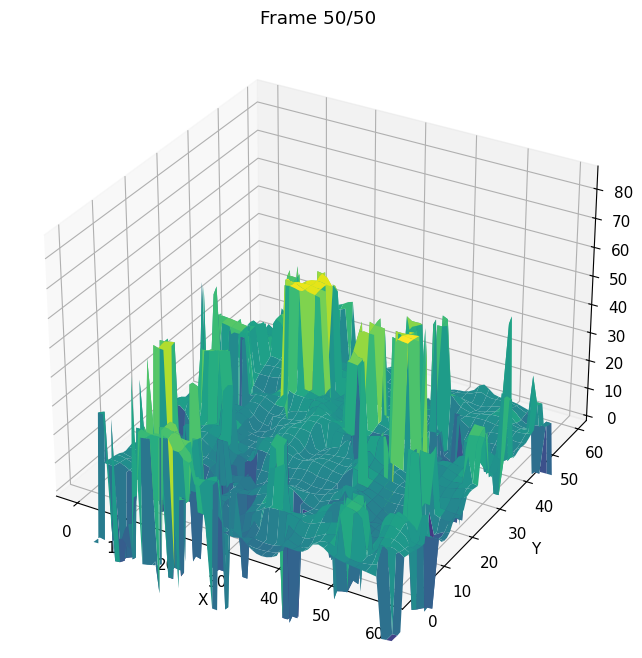

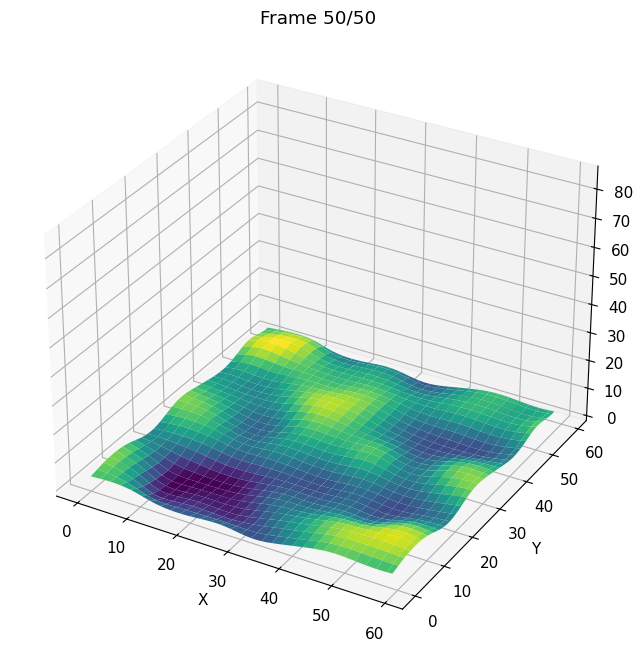

No such comm: ca3700121998405788d26ea069dfe3a2
No such comm: ca3700121998405788d26ea069dfe3a2
No such comm: ca3700121998405788d26ea069dfe3a2
No such comm: ca3700121998405788d26ea069dfe3a2


In [28]:
%matplotlib inline
for smearing_level, surfaces in smooth_surfaces.items():
    number_of_frames = 50
    file_name = "-".join(folder.split("/")[-2:])
    fourier_surface.animate_surface_in_3d(surfaces[0:number_of_frames], volume, output_file=f"../videos/surfaces/{file_name}-smear-{smearing_level}.mp4", fps=10)
